In [48]:
# data manipulation
import pandas as pd  
import seaborn as sns
import numpy as np 
import warnings
import matplotlib.pyplot as plt
from scipy.stats import iqr
from matplotlib.ticker import PercentFormatter

# machine learning
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve, f1_score, classification_report


warnings.filterwarnings('ignore')
%matplotlib inline

In [49]:
student_data = pd.read_csv('/Users/ankushkhullar/Desktop/TRIAD/input/test_data.tsv', sep='\t')

In [50]:
student_data = student_data.drop(['first', 'last', 'notes'], axis=1)
student_data['sex'] = student_data['sex'].map({'Male': 1, 'Female': 0})
student_data[['dojo_class', 'test_prep', 'pass']] = student_data[['dojo_class', 'test_prep', 'pass']].astype(int)
student_data[['age', 'hours_studied']] = preprocessing.scale(student_data[['age', 'hours_studied']])
student_data.head()

,sex,lang,country,age,hours_studied,dojo_class,test_prep,pass
0,0,English,UK,2.884987,-0.436199,0,0,1
1,0,Japanese,Japan,-1.085694,-1.231291,0,0,0
2,1,Japanese,Japan,-1.085694,NaN,0,0,1
3,1,Japanese,Japan,0.420427,NaN,1,0,1
4,1,Japanese,Japan,2.200387,NaN,1,0,1


In [51]:
data_to_impute = student_data.drop('pass', axis=1)
data_to_impute = pd.get_dummies(data_to_impute)
data_to_impute.head()

,sex,age,hours_studied,dojo_class,test_prep,lang_English,lang_Finnish,lang_French,lang_Italian,lang_Japanese,...,country_Australia,country_Finland,country_France,country_Italy,country_Japan,country_Mexico,country_New Zealand,country_Spain,country_UK,country_USA
0,0,2.884987,-0.436199,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,-1.085694,-1.231291,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,-1.085694,NaN,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,0.420427,NaN,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,1,2.200387,NaN,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [52]:
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed = knn_imputer.fit_transform(data_to_impute)
knn_imputed = pd.DataFrame(knn_imputed)
knn_imputed.columns = data_to_impute.columns
knn_imputed.head()

,sex,age,hours_studied,dojo_class,test_prep,lang_English,lang_Finnish,lang_French,lang_Italian,lang_Japanese,...,country_Australia,country_Finland,country_France,country_Italy,country_Japan,country_Mexico,country_New Zealand,country_Spain,country_UK,country_USA
0,0.0,2.884987,-0.436199,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,-1.085694,-1.231291,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-1.085694,0.426056,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.420427,-0.092421,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.200387,0.407879,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
student_data['hours_studied'] = knn_imputed['hours_studied']
student_data.tail()

,sex,lang,country,age,hours_studied,dojo_class,test_prep,pass
4995,1,Japanese,Japan,1.105027,-1.105517,0,0,1
4996,0,Japanese,Japan,-1.085694,0.007207,0,0,1
4997,1,Japanese,Japan,0.557347,1.019767,1,0,1
4998,1,Japanese,Japan,-1.085694,-0.838430,1,0,0
4999,0,Japanese,Japan,-0.948774,-0.037789,1,0,1


In [54]:
model_data = student_data.drop(['country', 'lang', 'test_prep'], axis=1)
model_data.head()

,sex,age,hours_studied,dojo_class,pass
0,0,2.884987,-0.436199,0,1
1,0,-1.085694,-1.231291,0,0
2,1,-1.085694,0.426056,0,1
3,1,0.420427,-0.092421,1,1
4,1,2.200387,0.407879,1,1


In [55]:
X = model_data.drop('pass', axis=1)
y = model_data['pass']
X.head()

,sex,age,hours_studied,dojo_class
0,0,2.884987,-0.436199,0
1,0,-1.085694,-1.231291,0
2,1,-1.085694,0.426056,0
3,1,0.420427,-0.092421,1
4,1,2.200387,0.407879,1


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4000, 4) (1000, 4) (4000,) (1000,)


In [57]:
y_train.value_counts(normalize=True)

1    0.78175
0    0.21825
Name: pass, dtype: float64

In [58]:
sampler = SMOTE(random_state=2)
X_train_smote, y_train_smote = sampler.fit_sample(X, y)

In [59]:
y_train_smote.value_counts(normalize=True)

1    0.5
0    0.5
Name: pass, dtype: float64

In [60]:
kfold = StratifiedKFold(n_splits=10)

In [61]:
random_state = 2
classifiers = {
    'svc': SVC(random_state=random_state), 
    'dt': DecisionTreeClassifier(random_state=random_state), 
    'ada': AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1), 
    'rf': RandomForestClassifier(random_state=random_state), 
    'gb': GradientBoostingClassifier(random_state=random_state), 
    'mlp': MLPClassifier(random_state=random_state), 
    'knn': KNeighborsClassifier(), 
    'logreg': LogisticRegression(random_state=random_state), 
    'lda': LinearDiscriminantAnalysis(), 
    'xgb': XGBClassifier(random_state=random_state)
}

cv_results = []
for label, classifier in classifiers.items():
    cv_results.append(cross_val_score(classifier, X_train_smote, y_train_smote, scoring = 'accuracy', cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({
    'cv_means': cv_means,
    'cv_errors': cv_std,
    'algorithm': [
        'SVC',
        'DecisionTree',
        'AdaBoost',
        'RandomForest',
        'GradientBoosting',
        'MultipleLayerPerceptron',
        'KNeighboors',
        'LogisticRegression',
        'LinearDiscriminantAnalysis', 
        'XGBClassifier'
    ]
})

In [62]:
cv_res = cv_res.sort_values(by='cv_means', ascending=False).reset_index(drop=True)
cv_res

,cv_means,cv_errors,algorithm
0,0.730222,0.045463,RandomForest
1,0.718310,0.049476,AdaBoost
2,0.707291,0.039046,DecisionTree
3,0.703180,0.033584,GradientBoosting
4,0.692804,0.029142,XGBClassifier
5,0.688581,0.027447,KNeighboors
6,0.645140,0.015189,MultipleLayerPerceptron
7,0.640400,0.011898,SVC
8,0.621568,0.014510,LogisticRegression
9,0.619903,0.014056,LinearDiscriminantAnalysis


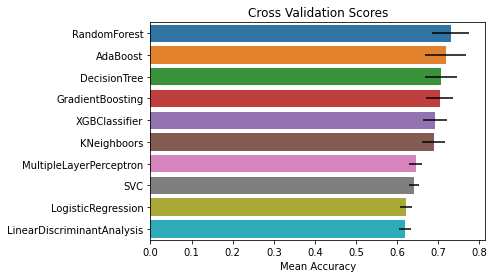

In [63]:
g = sns.barplot('cv_means', 'algorithm', data = cv_res, orient = 'h', **{'xerr':cv_res['cv_errors']})
g.set(xlabel='Mean Accuracy', ylabel='', title='Cross Validation Scores')
plt.savefig('/Users/ankushkhullar/Desktop/TRIAD/figures/cv_scores.png', dpi=600, bbox_inches='tight')

In [72]:
rf = RandomForestClassifier(random_state=random_state)
rf.fit(X_train_smote, y_train_smote)
rf.score(X_train_smote, y_train_smote)

0.9201895977453242

In [73]:
accuracy = rf.score(X_test, y_test)
accuracy

0.907

In [66]:
estimator = rf.estimators_[5]

In [67]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
indices

array([2, 1, 0, 3])

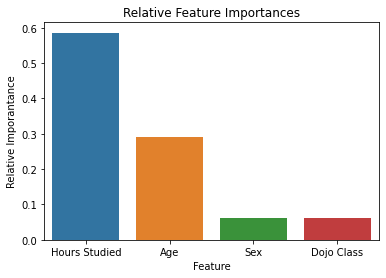

In [68]:
g = sns.barplot(x=X_train_smote.columns[indices], y=importances[indices])
g.set(xlabel='Feature', ylabel='Relative Imporantance', title='Relative Feature Importances', xticklabels=['Hours Studied', 'Age', 'Sex', 'Dojo Class'])
plt.savefig('/Users/ankushkhullar/Desktop/TRIAD/figures/feature_importances.png', dpi=600, bbox_inches='tight')

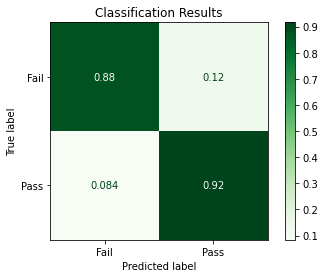

In [69]:
plot_confusion_matrix(rf, X_test, y_test, normalize='true', display_labels=['Fail', 'Pass'], cmap=plt.cm.Greens)
plt.title('Classification Results')
plt.savefig('/Users/ankushkhullar/Desktop/TRIAD/figures/confusion_matrix.png', dpi=600, bbox_inches='tight')

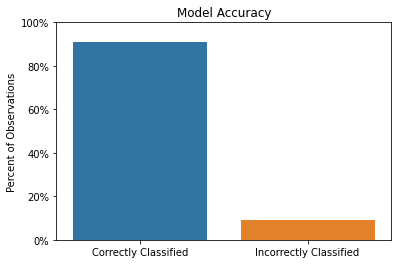

In [70]:
ax = sns.barplot(x=['Correctly Classified', 'Incorrectly Classified'], 
           y = [accuracy, 1-accuracy])
ax.set(title= 'Model Accuracy', ylabel = 'Percent of Observations', ylim=(0,1))
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('/Users/ankushkhullar/Desktop/TRIAD/figures/accuracy.png', dpi=600, bbox_inches='tight')